In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import *
from keras.models import Sequential
import os
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
test_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

In [4]:
# Image Classes
image_classes = os.listdir('/kaggle/input/covid19-image-dataset/Covid19-dataset/train')
image_classes

['Normal', 'Viral Pneumonia', 'Covid']

# Data Visualization

In [11]:
def plot_image(image_classes):
    plt.figure(figsize = (12,12))
    for i , category in enumerate(image_classes):
        image_path = train_path + '/' + category
        image_in_folder = os.listdir(image_path)

        first_image = image_in_folder[0]
        first_image_path = image_path + '/' + first_image

        img= image.load_img(first_image_path)
        image_array = image.img_to_array(img) / 255

        plt.subplot(1,3, i+1)
        plt.imshow(image_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

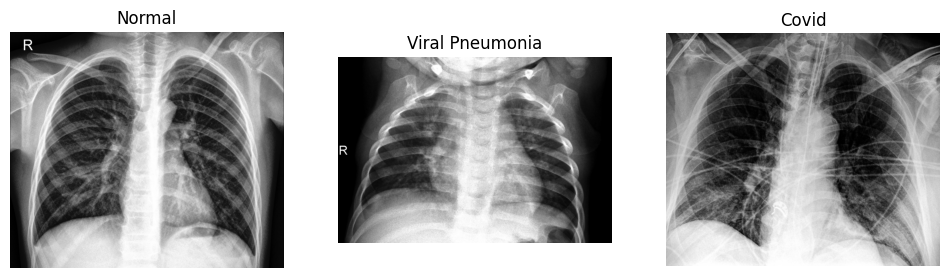

In [12]:
plot_image(image_classes)

#  Image Preprocessing

In [17]:
data_generator = ImageDataGenerator(rescale = 1 / 255)

In [18]:
# train data
train_data = data_generator.flow_from_directory(train_path ,
                                                target_size = (224 , 224),
                                                batch_size = 16)
                    

Found 251 images belonging to 3 classes.


In [20]:
# test data
test_data = data_generator.flow_from_directory(test_path ,
                                                target_size = (224 , 224),
                                                batch_size = 1)
                    

Found 66 images belonging to 3 classes.


#  model building

In [25]:
#  model building
cnn_model = Sequential()
# add conv layer with filter , kernel_size , activationand and input shape 
cnn_model.add(Conv2D(filters = 32 , kernel_size = 3, padding = 'same' , activation = 'relu' , input_shape = [224 , 224 , 3]))

# add max pooling layer
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

# add conv layer with filter , kernel_size , activationand and input shape 
cnn_model.add(Conv2D(filters = 64 , kernel_size = 3, padding = 'same' , activation = 'relu'))

# add max pooling layer
cnn_model.add(MaxPooling2D())

# add conv layer with filter , kernel_size , activationand and input shape 
cnn_model.add(Conv2D(filters = 128 , kernel_size = 3, padding = 'same' , activation = 'relu'))

# add max pooling layer
cnn_model.add(MaxPooling2D())

# add flatten layer
cnn_model.add(Flatten())
# fully connected layer
cnn_model.add(Dense(128 , activation = 'relu'))
cnn_model.add(Dense(128 , activation = 'relu'))

# output layer
cnn_model.add(Dense(3 , activation = 'softmax'))

#  compile model

In [34]:
cnn_model.compile(optimizer = 'adam' ,  loss = 'categorical_crossentropy' , metrics = ['accuracy'])

# model fitting

In [35]:
model_history = cnn_model.fit(train_data, epochs = 5 , validation_data = test_data)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.4969 - loss: 2.8512 - val_accuracy: 0.6364 - val_loss: 0.8031
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7659 - loss: 0.5771 - val_accuracy: 0.6364 - val_loss: 0.8797
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8453 - loss: 0.3287 - val_accuracy: 0.8788 - val_loss: 0.3258
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9817 - loss: 0.1401 - val_accuracy: 0.9091 - val_loss: 0.2749
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9957 - loss: 0.0323 - val_accuracy: 0.8333 - val_loss: 0.5739


# model performance visualization

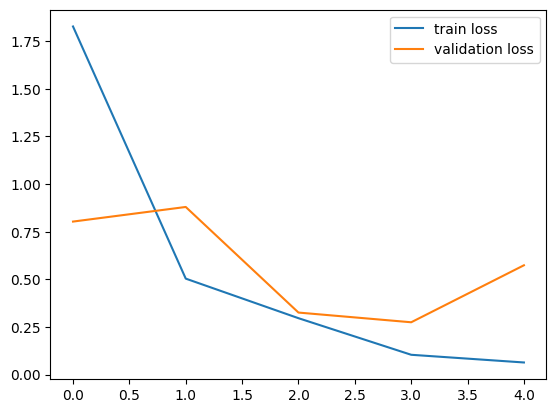

In [37]:
plt.plot(model_history.history['loss'] , label = 'train loss')
plt.plot(model_history.history['val_loss'] , label = 'validation loss')
plt.legend()
plt.show()

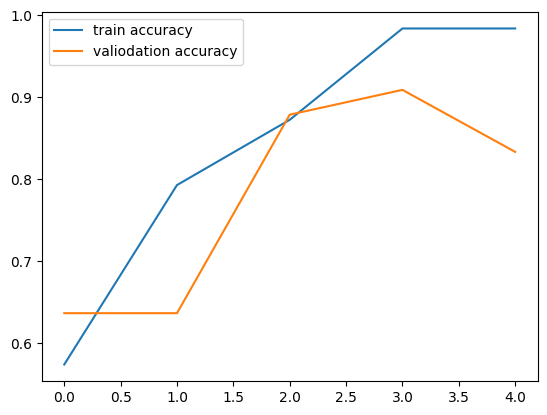

In [38]:
plt.plot(model_history.history['accuracy'] , label = 'train accuracy')
plt.plot(model_history.history['val_accuracy'] , label  = 'valiodation accuracy')
plt.legend()
plt.show()

# model evaluation

In [41]:
cnn_model.evaluate(test_data)

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7733 - loss: 0.7569


[0.573867678642273, 0.8333333134651184]

In [42]:
cnn_model.evaluate(train_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 502ms/step - accuracy: 0.9832 - loss: 0.0534


[0.06026078015565872, 0.9721115827560425]

# predict new image

In [44]:
testing_image = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0105.png'



In [45]:
class_map = dict([value , key] for key,value in train_data.class_indices.items())
class_map

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [57]:
import numpy as np
def predict_image(testing_image , actual_label):

    # load & prerpocessing image
    test_image = image.load_img(testing_image , target_size = (224 , 224))
    test_img_arr  = image.img_to_array(test_image)/ 255
    test_img_input = test_img_arr.reshape((1 , test_img_arr.shape[0] ,  test_img_arr.shape[1] ,  test_img_arr.shape[2]))

   # make prediction
    predicted_class = np.argmax(cnn_model.predict(test_img_input))
    predicted_img = class_map[predicted_class]

    plt.figure(figsize = (4,4))
    plt.imshow(test_img_arr)
    plt.title('actual label : {} ,predicted label : {}'.format(actual_label, predicted_img))
    plt.grid()
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


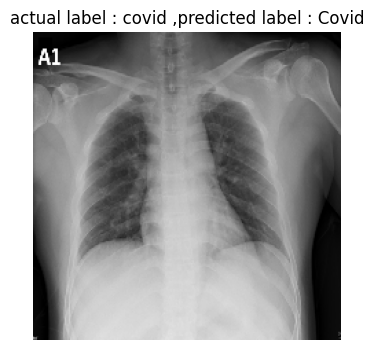

In [58]:

predict_image(testing_image , actual_label = 'covid')

#  save model

In [60]:
cnn_model.save('covid_19_model.h5')